<a href="https://colab.research.google.com/github/FatoniRahmat/Data-Analyst-in-Python/blob/main/Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup Environment & Run Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Load Data

In [2]:
#Read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1Bqb2MP-laM9cINHJGP9f5-8DYOK5wlFOUID6nxgRwOM/edit#gid=1268420291'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.3


#Basic steps
1.Check Variable Names

2.Check Data Type

3.Handle Missing Values

4.Check Duplicate Records

##1. Check Variable Names
Column names provide a clear identification of the data contained within each column. By reviewing the column names, i can quickly understand the type of information stored in each column. This helps me make sense of the data and interpret it correctly.


In [3]:
#Check columns
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Now, we change name of the columns:

In [4]:
#Rename columns
df = df.rename(columns={'cogs':'Cogs', 'gross margin percentage':'Gross Margin Percentage', 'gross income':'Gross Income'})
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'Cogs', 'Gross Margin Percentage', 'Gross Income',
       'Rating'],
      dtype='object')

##2. Check Data Type
Checking the data types is an important step in data cleaning because it helps ensure the consistency, accuracy, and reliability of the data.

In [5]:
#Check data type
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
Cogs                       float64
Gross Margin Percentage    float64
Gross Income               float64
Rating                     float64
dtype: object

Based on data documentation, we must check whether the data type of variables is correct or not. The result shows, there is something wrong about Date.

In [6]:
#change type data
df['Date'] = pd.to_datetime(df.Date).dt.tz_localize(None)
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
Cogs                              float64
Gross Margin Percentage           float64
Gross Income                      float64
Rating                            float64
dtype: object

##3. Handle Missing Values
Checking for missing values is an important step in data cleaning because missing values can have a significant impact on the quality and reliability of the data analysis. Missing values can lead to incomplete or inaccurate data, which can skew the analysis and produce misleading results. By identifying and handling missing values appropriately, me ensure the integrity and reliability of the data.

In [7]:
#Check the amount of missing values
def nulls(df):
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0] / len(df)
    null_values.columns = ['count','%pct']
    filtered_null = null_values[null_values['%pct'] > 0].sort_values(by='%pct', ascending=False)
    return filtered_null
nulls(df)

,count,%pct


In [8]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
Cogs                       0
Gross Margin Percentage    0
Gross Income               0
Rating                     0
dtype: int64

They are not missing values.

In [9]:
#Check typo
for col_name in ['Payment', 'Branch', 'City', 'Customer type', 'Gender', 'Product line']:
 print(df[col_name].value_counts(), '\n')

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64 

A    340
B    332
C    328
Name: Branch, dtype: int64 

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64 

Member    501
Normal    499
Name: Customer type, dtype: int64 

Female    501
Male      499
Name: Gender, dtype: int64 

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64 



They are not typo.

##4. Check Duplicate Rows
Duplicate rows can compromise the integrity of the dataset. If we have multiple identical rows, it can lead to inaccurate statistical analysis, misleading results, and duplicate entries in downstream processes. By identifying and removing duplicate rows, we ensure that the data accurately represents the underlying information.

In [10]:
#Check data duplicated
df.duplicated().sum()

0

So, they are not duplicated rows.

#Export the File
Export cleaned data.

In [11]:
#Export data
df.to_csv('Supermarket_Dataset_Cleaned.csv')

#Exploratory Data Analysis (EDA)

##1. Number of purchases per month

In [12]:
#Add the columns Month, Day and Hour for the Date
df.insert(loc=11, column='year_month', value=df['Date'].map(lambda x: 100*x.year + x.month))
df.insert(loc=12, column='month', value=df.Date.dt.month)
#+1 to make Monday=1.....until Sunday=7
df.insert(loc=13, column='day', value=(df.Date.dt.dayofweek)+1)

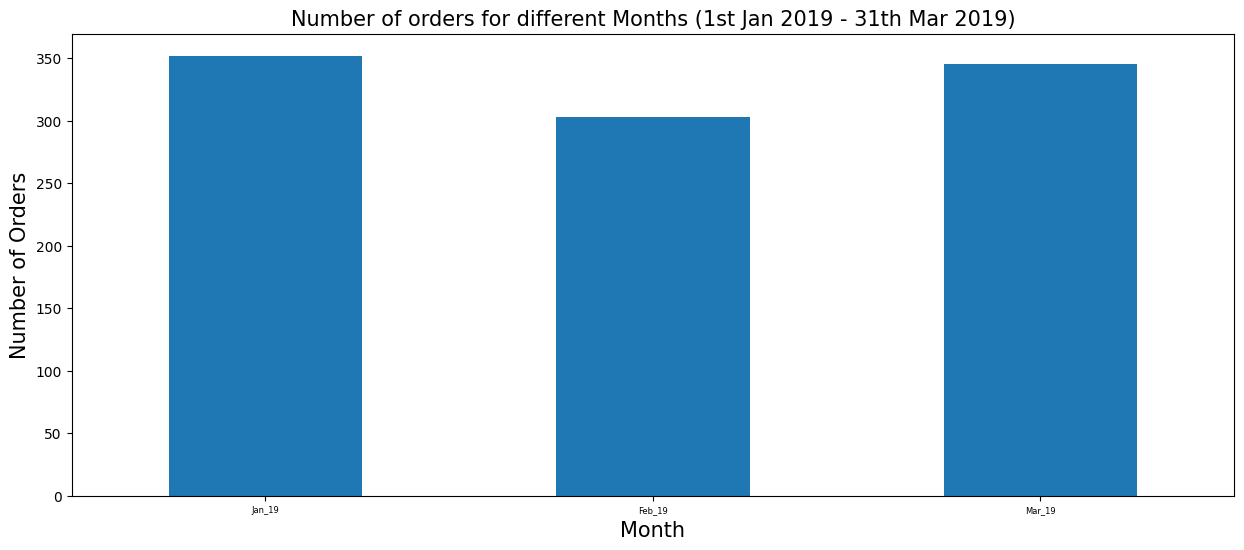

In [13]:
#Create orders per month graph
ax = df.groupby('Invoice ID')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Jan 2019 - 31th Mar 2019)',fontsize=15)
ax.set_xticklabels(('Jan_19','Feb_19','Mar_19'), rotation='horizontal', fontsize=6)
plt.show()

##2. Daily trend overall

In [14]:
#Create an daily trend column
agg_daily = df.groupby('Date', as_index=False) ['Total', 'Quantity'].sum()
agg_daily.head()

,Date,Total,Quantity
0,2019-01-01,4745.19,81
1,2019-01-02,1945.50,48
2,2019-01-03,2078.12,37
3,2019-01-04,1623.68,32
4,2019-01-05,3536.69,55


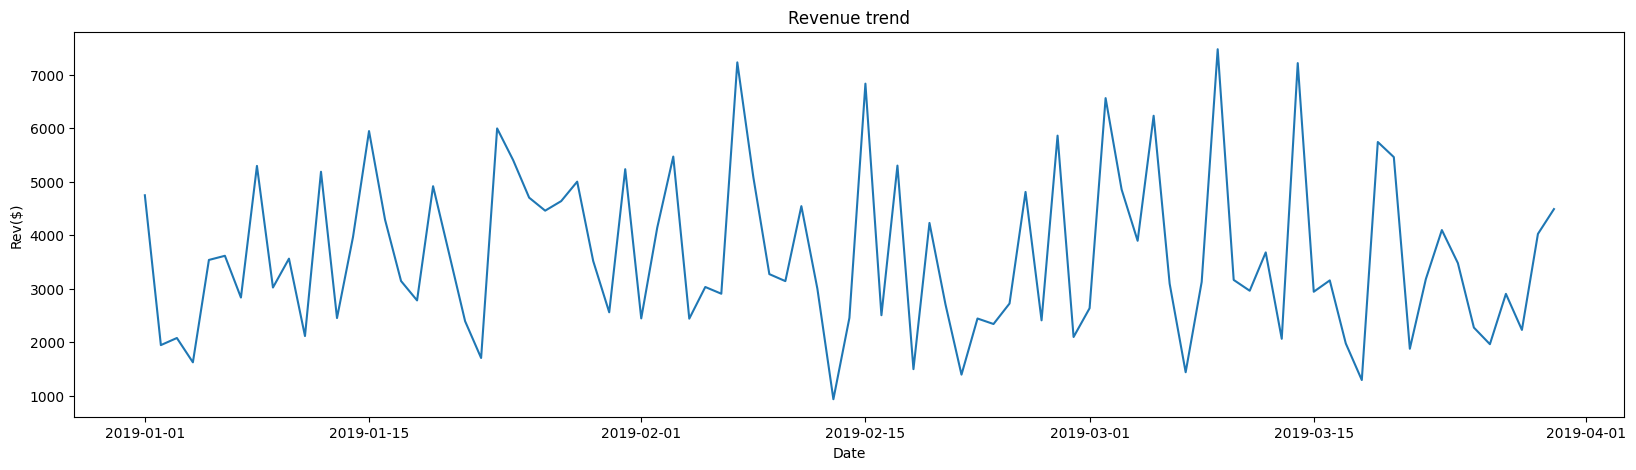

In [15]:
#Create daily trend graph
plt.rcParams["figure.figsize"] = (20,5)
plt.plot('Date', 'Total', data=agg_daily)
plt.title('Revenue trend')
plt.xlabel('Date')
plt.ylabel('Rev($)')
plt.show()

revenue of our data has seasonality

In [16]:
#number of purchases per day
#Monday=1.....until Sunday=7
df.groupby('Invoice ID')['day'].mean().value_counts().sort_index()

1.0    125
2.0    158
3.0    143
4.0    138
5.0    139
6.0    164
7.0    133
Name: day, dtype: int64

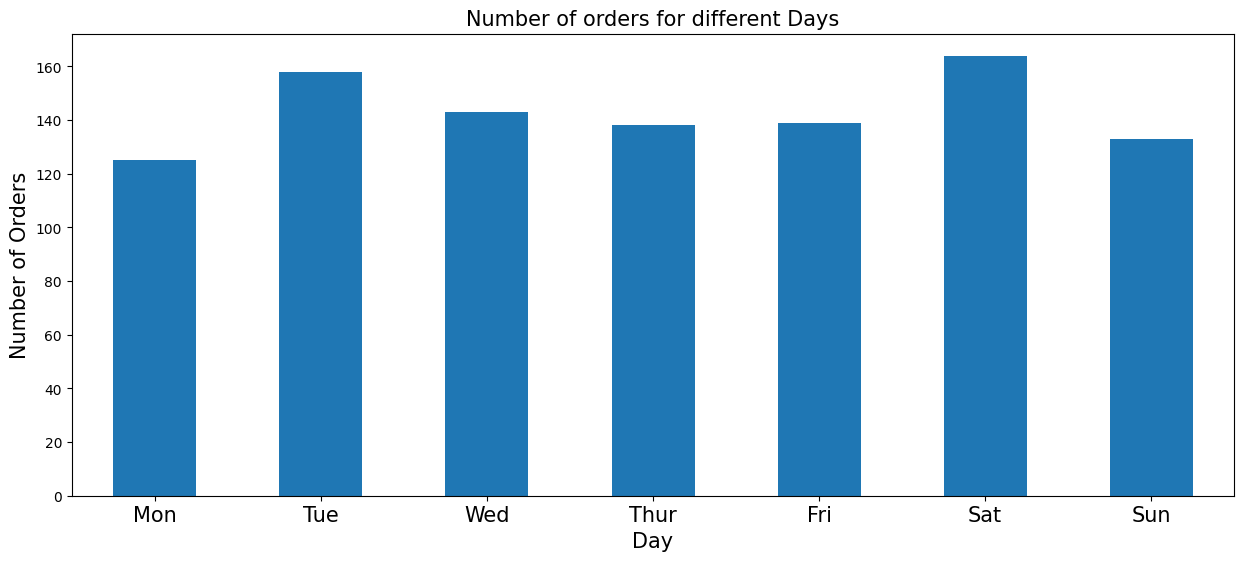

In [17]:
#Create orders per day graph
ax = df.groupby('Invoice ID')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'), rotation='horizontal', fontsize=15)
plt.show()

##3. Orders by payment

In [18]:
agg_payment = df.groupby('Payment', as_index=False).agg({'Total': 'sum', 'Invoice ID':'nunique'})
agg_payment.head()

,Payment,Total,Invoice ID
0,Cash,112206.76,344
1,Credit card,100767.29,311
2,Ewallet,109993.38,345


<Axes: xlabel='Payment', ylabel='Total'>

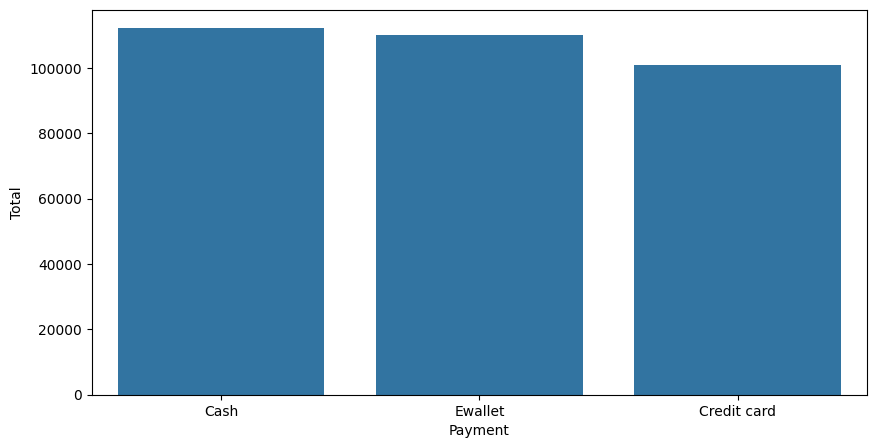

In [19]:
#Graph of revenue based on payments
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(x='Payment', y='Total', data=agg_payment.sort_values('Total', ascending=False))

<Axes: xlabel='Payment', ylabel='Invoice ID'>

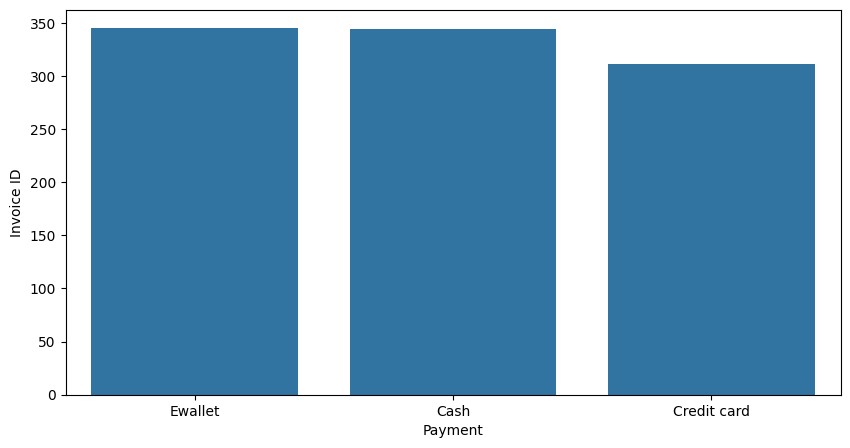

In [20]:
#Graph orders by payment
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(x='Payment', y='Invoice ID', data=agg_payment.sort_values('Invoice ID', ascending=False))

([<matplotlib.patches.Wedge at 0x7c5b50457be0>,
 [Text(0.5073037671355171, 0.9760342657151506, 'Cash'),
  Text(-1.0997450637520805, -0.023681105399296402, 'Credit card'),
  Text(0.528198440615191, -0.9648867329027179, 'Ewallet')],
 [Text(0.276711145710282, 0.5323823267537184, '34.7%'),
  Text(-0.5998609438647712, -0.012916966581434399, '31.2%'),
  Text(0.28810824033555865, -0.5263018543105733, '34.1%')])

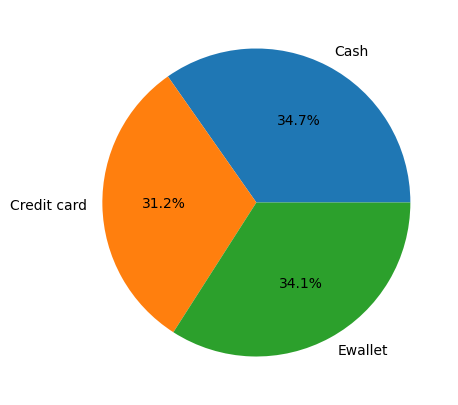

In [21]:
#Percentage of income based on payments
plt.pie(agg_payment['Total'], labels=agg_payment['Payment'],autopct='%.1f%%')

##4. By gender and by product type

In [22]:
#line product purchases based on gender
agg_gend=df.groupby(['Gender', 'Product line'], as_index=False)['Invoice ID'].nunique()
agg_gend.head()

,Gender,Product line,Invoice ID
0,Female,Electronic accessories,84
1,Female,Fashion accessories,96
2,Female,Food and beverages,90
3,Female,Health and beauty,64
4,Female,Home and lifestyle,79


<Axes: xlabel='Product line', ylabel='Invoice ID'>

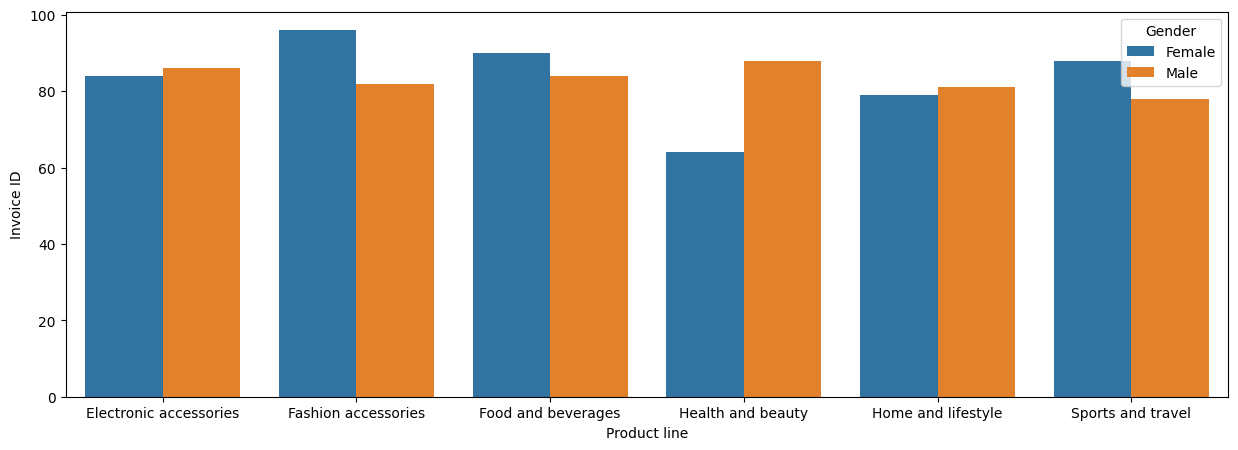

In [23]:
plt.rcParams["figure.figsize"] = (15,5)
sns.barplot(x='Product line', y='Invoice ID', data=agg_gend, hue='Gender')

##5. Data branch and data product.




In [24]:
#Branch data that has the highest rating
df[['Invoice ID', 'Branch', 'Rating']].sort_values('Rating', ascending=False)

,Invoice ID,Branch,Rating
387,725-56-0833,A,10.0
159,423-57-2993,B,10.0
853,866-70-2814,B,10.0
62,347-34-2234,B,10.0
60,285-68-5083,C,10.0
...,...,...,...
379,182-69-8360,B,4.0
848,845-94-6841,C,4.0
643,131-15-8856,C,4.0
328,730-61-8757,B,4.0


In [25]:
#Bproduct line data that has the highest gross income
df[['Invoice ID', 'Product line', 'Gross Income']].sort_values('Gross Income', ascending=False)

,Invoice ID,Product line,Gross Income
350,860-79-0874,Fashion accessories,49.65
167,687-47-8271,Fashion accessories,49.49
557,283-26-5248,Food and beverages,49.26
699,751-41-9720,Home and lifestyle,48.75
996,303-96-2227,Home and lifestyle,48.69
...,...,...,...
402,236-86-3015,Home and lifestyle,0.70
443,192-98-7397,Fashion accessories,0.64
223,279-62-1445,Fashion accessories,0.63
629,308-39-1707,Fashion accessories,0.60


##6. Pie chart comparing the number of male and female buyers.

In [26]:
#number of male and female buyers
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

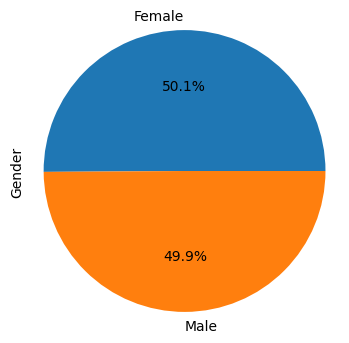

In [27]:
#Comparison of male and female buyers
buyers = df['Gender'].value_counts()
buyers.plot(kind='pie', figsize=(4,4), autopct='%.1f%%')
plt.axis('equal')
plt.show()

##7. Overall sales revenue.

In [28]:
#Show total revenue
df['Revenue'] = df['Unit price'] * df['Quantity']
total_revenue = df['Revenue'].sum()
print(total_revenue)

307587.38


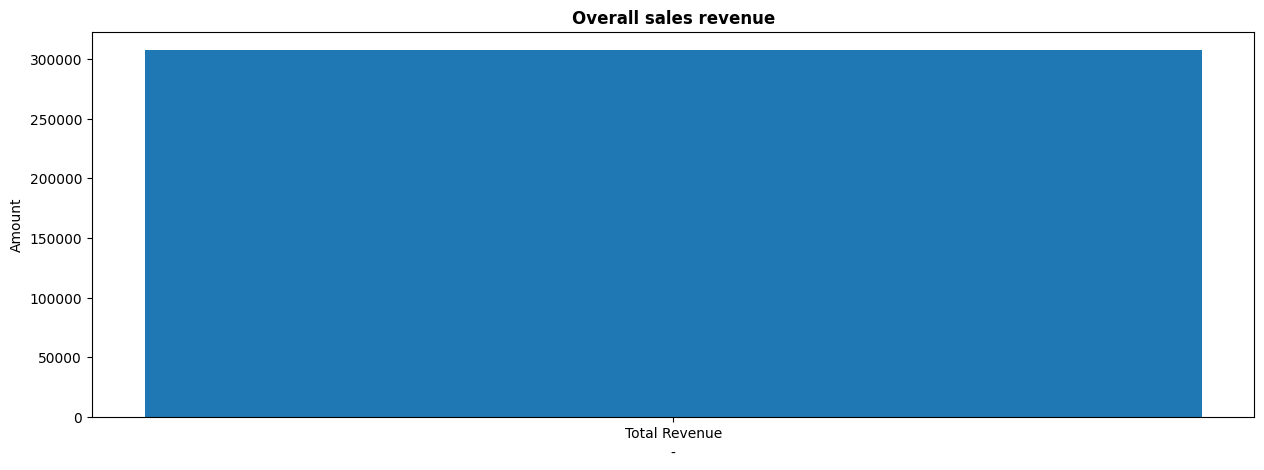

In [29]:
#Show bar chart
plt.bar('Total Revenue', total_revenue,)
plt.title("Overall sales revenue", fontsize=12, fontweight='bold')
plt.xlabel('-')
plt.ylabel('Amount')
plt.show()